# SI Figure 4: Illustrative Pathways

In [1]:
import pyam 
import matplotlib.pyplot as plt 
from pathlib import Path 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import string 
from silicone.utils import convert_units_to_MtCO2_equiv
plt.style.use(
    "plotting_template.mplstyle"
)

<IPython.core.display.Javascript object>

# Read in the necessary data

In [2]:
data_folder = Path(
    "..", "data"
)

In [3]:
data_file = Path(
    data_folder / "AR6_Scenarios_Snapshot.xlsx"
)

In [4]:
df_ar6 = pyam.IamDataFrame(data_file)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ../data/AR6_Scenarios_Snapshot.xlsx
pyam.core - INFO: Reading meta indicators


In [5]:
meta_file = Path(
    data_folder / "AR6_Scenarios_Updated_Meta.xlsx"
)

In [6]:
df_ar6.load_meta(meta_file)

pyam.core - INFO: Reading meta indicators


In [7]:
mod_scens_color = [ 
    ("MESSAGEix-GLOBIOM 1.0", "LowEnergyDemand_1.3_IPCC", "#e69f25",),
    ("REMIND-MAgPIE 2.1-4.2", "SusDev_SDP-PkBudg1000", "#069f72"), 
    ("MESSAGE-GLOBIOM 1.0", "SSP2-19", "#0773b2")
]

In [8]:
df_c1_nzero = df_ar6.filter(
    Category = "C1",
    variable = [ 
        "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile",
        "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|Rolling Mean|50.0th Percentile"
    ]
)

In [9]:
def plotting_helper(variable, ax, **kwargs):
    for mod, scen, color in mod_scens_color:
        plot_data = df_c1_nzero.filter(
            model = mod, 
            scenario = scen, 
            variable = variable
        )
        plot_data.plot(
            ax = ax,
            color = color, 
            **kwargs
        )
    ax.set_title("")

(2000.0, 2100.0)

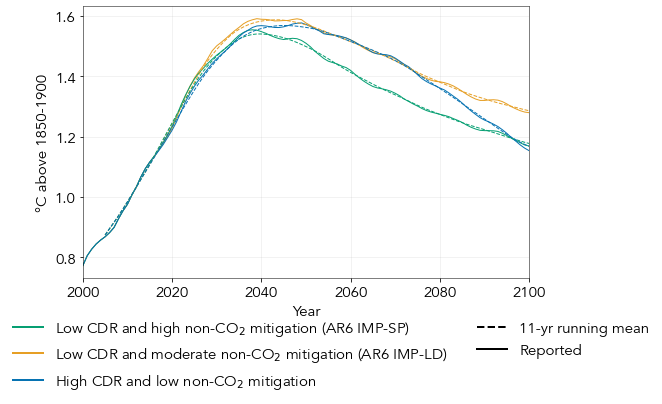

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))

leg_str = list()
plotting_helper("AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile", ax = ax) # Panel D
plotting_helper("AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|Rolling Mean|50.0th Percentile", linestyle="dashed",ax = ax) # Panel D

second_custom_legend = [
    Line2D([0], [0], color = "#069f72", lw=2, label = "Low CDR and high non-CO$_2$ mitigation (AR6 IMP-SP)"), 
    Line2D([0], [0], color = "#e69f25", lw=2, label = "Low CDR and moderate non-CO$_2$ mitigation (AR6 IMP-LD)"), 
    Line2D([0], [0], color = "#0773b2", lw=2, label = "High CDR and low non-CO$_2$ mitigation"),
    Line2D([0], [0], color = "black", lw=2, linestyle = "dashed", label = "11-yr running mean"),
    Line2D([0], [0], color = "black", lw=2, label = "Reported")
]

ax.legend(
    handles = second_custom_legend, 
    ncol = 2, 
    bbox_to_anchor = (1.3, -0.1)
)

ax.set_ylabel("°C above 1850-1900")
ax.set_xlim(2000,2100)

In [11]:
fig.savefig(
    Path("figures/SI Figure 4.png")
)